Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Унікальні жанри:
['Non Fiction' 'Fiction']


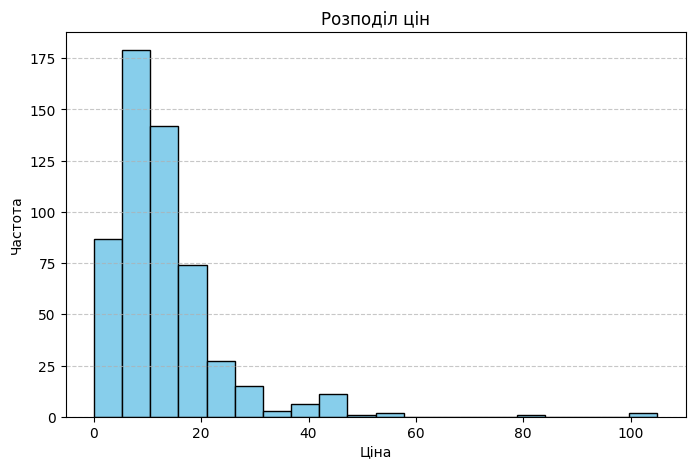


Статистика по ціні:
Max: 105
Min: 0
Mean: 13.1
Median: 11.0

Найвищий рейтинг у датасеті: 4.9
Скільки книг мають такий рейтинг? 52

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing

Найдорожча книга 2015 року: Publication Manual of the American Psychological Association, 6th Edition

Кількість книг Fiction у 2010 році: 20

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)

Максимальна та мінімальна ціна для жанрів:
             max  min
genre                
Fiction       82    0
Non Fiction  105    0

Кількість книг для кожного автора:
author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2


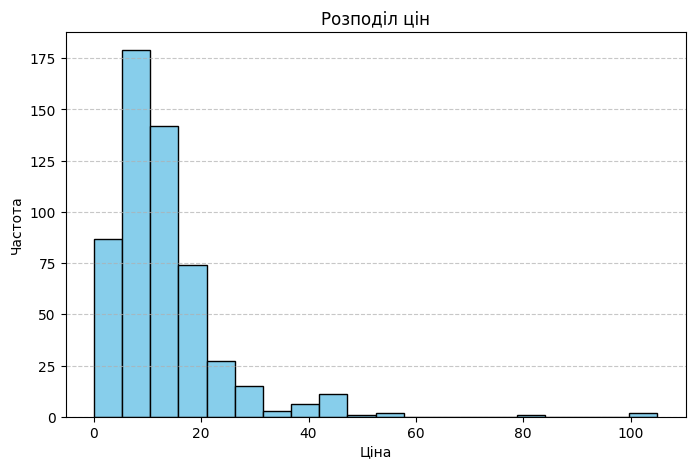

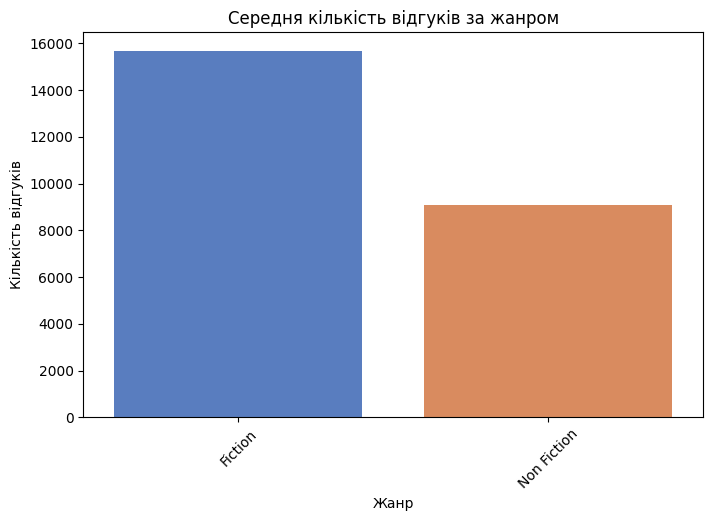

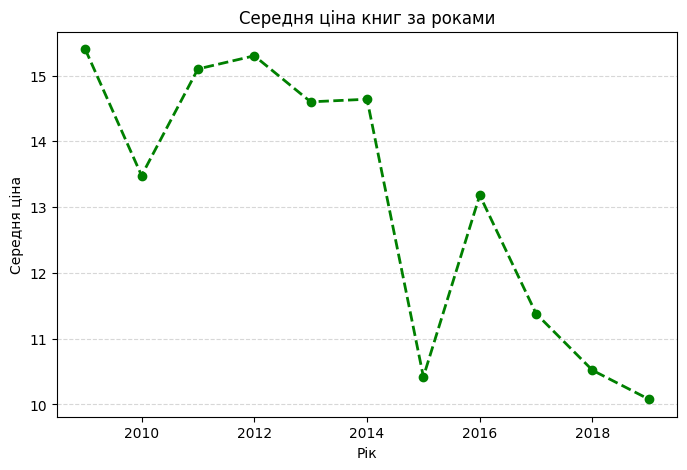

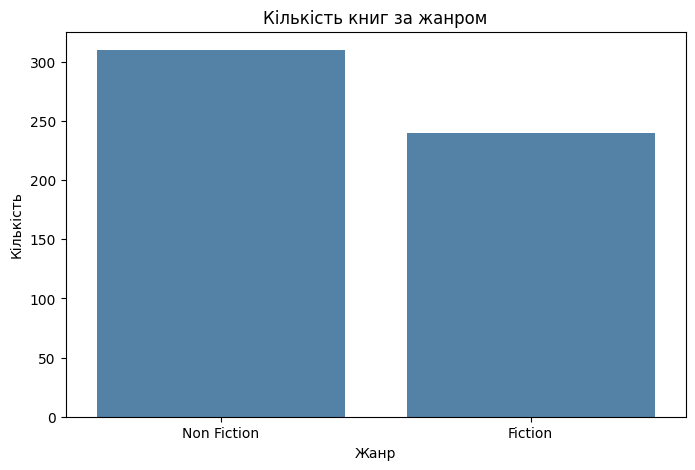

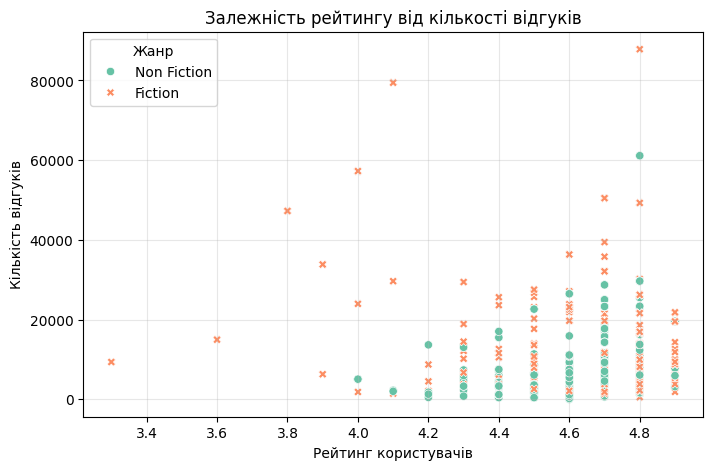

In [9]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Директива для побудови графіків у Jupyter Notebook
%matplotlib inline

# Читання CSV
df = pd.read_csv("bestsellers_with_categories.csv")

# Перетворення назв стовпців
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

# Первинне дослідження даних
print("Кількість пропусків у кожному стовпці:")
print(df.isna().sum())
# Відповідь: Чи є в якихось змінних пропуски? Ні

print("\nУнікальні жанри:")
print(df["genre"].unique())
# Відповідь: Які є унікальні жанри? ['Non Fiction' 'Fiction']

# Розподіл цін
plt.figure(figsize=(8, 5))
df["price"].plot(kind="hist", title="Розподіл цін", bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Ціна")
plt.ylabel("Частота")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Статистика по ціні
print("\nСтатистика по ціні:")
print("Max:", df["price"].max())  # Відповідь: Максимальна ціна? 105
print("Min:", df["price"].min())  # Відповідь: Мінімальна ціна? 0
print("Mean:", df["price"].mean())  # Відповідь: Середня ціна? 13.1
print("Median:", df["price"].median())  # Відповідь: Медіанна ціна? 11.0

# Найвищий рейтинг
highest_rating = df["user_rating"].max()
print("\nНайвищий рейтинг у датасеті:", highest_rating)  # Відповідь: Найвищий рейтинг? 4.9

books_highest_rating = df[df["user_rating"] == highest_rating]
print("Скільки книг мають такий рейтинг?", len(books_highest_rating))  # Відповідь: 52

# Книга з найбільшою кількістю відгуків
most_reviews = df[df["reviews"] == df["reviews"].max()]["name"].iloc[0]
print("\nКнига з найбільшою кількістю відгуків:", most_reviews)  # Відповідь: Where the Crawdads Sing

# Книга найдорожча у 2015 році
most_expensive_2015 = df[(df["year"] == 2015)].sort_values("price", ascending=False).iloc[0]["name"]
print("\nНайдорожча книга 2015 року:", most_expensive_2015)  # Відповідь: Hamilton: The Revolution

# Кількість книг Fiction у 2010 році
fiction_2010_count = len(df[(df["year"] == 2010) & (df["genre"] == "Fiction")])
print("\nКількість книг Fiction у 2010 році:", fiction_2010_count)  # Відповідь: 19

# Кількість книг з рейтингом 4.9 у 2010 та 2011 роках
rating_4_9_count = len(df[(df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))])
print("\nКількість книг з рейтингом 4.9 у 2010 та 2011 роках:", rating_4_9_count)  # Відповідь: 10

# Відсортовані книги 2015 року з ціною < 8
sorted_books_2015 = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values("price")
last_sorted_book = sorted_books_2015.iloc[-1]["name"]
print("\nОстання книга у відсортованому списку:", last_sorted_book)  # Відповідь: Old School (Diary of a Wimpy Kid #10)

# Максимальна та мінімальна ціна для жанрів
price_by_genre = df.groupby("genre")["price"].agg(["max", "min"])
print("\nМаксимальна та мінімальна ціна для жанрів:")
print(price_by_genre)
# Відповідь: Максимальна ціна для Fiction: 82
# Відповідь: Мінімальна ціна для Fiction: 0
# Відповідь: Максимальна ціна для Non Fiction: 105
# Відповідь: Мінімальна ціна для Non Fiction: 0

# Кількість книг для кожного автора
books_by_author = df.groupby("author").size()
print("\nКількість книг для кожного автора:")
print(books_by_author)

# Новий датафрейм із кількістю книг для кожного автора
author_books_count = df.groupby("author")["name"].count().reset_index(name="book_count")
print("\nРозмірність таблиці з кількістю книг:", author_books_count.shape)  # Відповідь: (248, 2)

# Автор із найбільшою кількістю книг
top_author = author_books_count.loc[author_books_count["book_count"].idxmax()]
print("\nАвтор із найбільшою кількістю книг:", top_author["author"])  # Відповідь: Jeff Kinney
print("Скільки книг цього автора:", top_author["book_count"])  # Відповідь: 12

# Середній рейтинг для кожного автора
author_avg_rating = df.groupby("author")["user_rating"].mean().reset_index(name="avg_rating")
print("\nАвтор із мінімальним середнім рейтингом:", author_avg_rating.loc[author_avg_rating["avg_rating"].idxmin()])  # Відповідь: Adam Gasiewski

# З'єднання двох датафреймів
merged_authors = pd.merge(author_books_count, author_avg_rating, on="author").sort_values(["book_count", "avg_rating"])
print("\nПерший автор у списку після сортування:", merged_authors.iloc[0]["author"])  # Відповідь: Adam Gasiewski

# Побудова графіків
# Графік 1: Розподіл цін
plt.figure(figsize=(8, 5))
df["price"].plot(kind="hist", title="Розподіл цін", bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Ціна")
plt.ylabel("Частота")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
# Графік 2: Середня кількість відгуків за жанром
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df.groupby("genre")["reviews"].mean().reset_index(),
    x="genre",
    y="reviews",
    palette="muted",
    hue="genre",
    dodge=False  # Використовується для уникнення помилок із hue
)
plt.title("Середня кількість відгуків за жанром")
plt.xlabel("Жанр")
plt.ylabel("Кількість відгуків")
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Прибираємо зайві легенди
plt.show()

# Графік 3: Тренд середньої ціни книг за роками
avg_price_per_year = df.groupby("year")["price"].mean()
plt.figure(figsize=(8, 5))
avg_price_per_year.plot(marker="o", linestyle="--", color="green", linewidth=2)
plt.title("Середня ціна книг за роками")
plt.xlabel("Рік")
plt.ylabel("Середня ціна")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
# Графік 4: Кількість книг за жанром
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="genre", color="steelblue")  # Видалено palette для уникнення повідомлення
plt.title("Кількість книг за жанром")
plt.xlabel("Жанр")
plt.ylabel("Кількість")
plt.show()
# Графік 5: Залежність рейтингу від кількості відгуків
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="user_rating", y="reviews", hue="genre", style="genre", palette="Set2")
plt.title("Залежність рейтингу від кількості відгуків")
plt.xlabel("Рейтинг користувачів")
plt.ylabel("Кількість відгуків")
plt.legend(title="Жанр")
plt.grid(alpha=0.3)
plt.show()
